In [10]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


# OPEN DATA FILE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# READ CSV DATA FILE

In [3]:
import pandas as pd
#BY USING PANDAS LIBRARY TO READ THE NON-HEADER DATAFILE
#NON-HEADER MEANS "FEATURES HAVE NO TITLES"
def read_data(path):
  data = pd.read_csv(path , header = None)
  return data

In [4]:
data = read_data('/content/drive/MyDrive/MAGIC04/magic04.csv')

#CONVERT DATA FRAME TO NUMPY ARRAY
data = data.to_numpy()
data.shape

(19020, 11)

# 1) Data Balancing


In [5]:
#ONLY TAKE DATA FOR 'G' CLASS TO BE EQAUL
#TO 'H' CLASS
#BY TAKING DATA FROM [:6688] FOR 'G' CLASS
#[1233:] FOR 'H' CLASS
def balance_data():
  _g_class_data = data[0:6688]
  _h_class_data = data[12333:]
  balanced_data = np.concatenate((_g_class_data , _h_class_data) , axis = 0)
  return balanced_data

In [6]:
b_data = balance_data()
np.random.shuffle(b_data)
b_data.shape

(13375, 11)

# 2)Data Split 


In [7]:
#SPLITING DATA INTO 30% TESTING SET
#70% TRAINIG SET
testing_set = b_data[0:4013]
training_set = b_data[4014:]

print(testing_set.shape)
print(training_set.shape)

(4013, 11)
(9361, 11)


In [8]:
#SPLIT TRUE LABELS FOR BOTH 
#TRAINIG SET ANS TESTING SET
testing_data_set = testing_set[:,0:-1]
testing_labels = testing_set[:,-1]

training_data_set = training_set[:,0:-1]
training_labels = training_set[:,-1]


# 3) a- Classification (KNN)

In [88]:
#APPLY KNN ALGORITHMS ON TRAINIG SET 
#FOR DIFF. K-VALUES TO GET HYPER PARAMETER TUNNING
#AND CHOOSE THE ONE GET THE BEST SCORE
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

def KNN(training_data , training_labels):
  dic = {}
  folds = KFold(n_splits=3 , shuffle=False , random_state=None)
  
  for k in range(1,45,2):
      score = 0
      for train_index , test_index in folds.split(training_data):
        _data_train , _data_validation = training_data[train_index] , training_data[test_index]
        _label_train , _label_validation = training_labels[train_index] , training_labels[test_index]
      
        knn = KNeighborsClassifier(n_neighbors= k ).fit(_data_train , _label_train)
        prediction = knn.predict(_data_validation)
        score = score + metrics.accuracy_score(_label_validation , prediction)
      dic[score / 3] = k
  
  list = dic.items()
  scores , k_values = zip(*list)
  
  loc = np.arange(1,45,step=2.0)
  
  plt.title("KNN")
  plt.plot(range(1,45,2) , scores)
  plt.xticks(loc)
  
  plt.xlabel("K-values")
  plt.ylabel("Accuracy")
  plt.show()

  max_score = max(scores)
  return dic.get(max_score)
  #TODO: return the parameter value

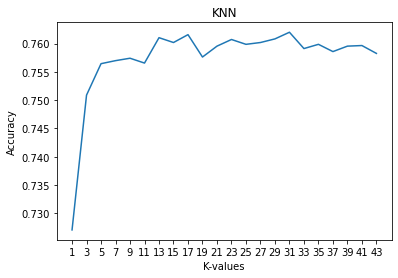

Trainig_accuracy =  0.7804721717765196
Testing_accuracy =  0.7722402192873162
Confusion_Matrix:  [[1746  265]
 [ 649 1353]]
Model_accuracy =  77.00145462055123 %


In [89]:
k = KNN(training_data_set , training_labels)
model_eva(k , "KNN")

# 4) MODEL EVALUATION

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

def model_eva(hyper_parameter , classifer):
  
  if classifer == "KNN":
    knn = KNeighborsClassifier(n_neighbors= hyper_parameter).fit(training_data_set , training_labels)
    test_prediction = knn.predict(testing_data_set)
    train_prediction = knn.predict(training_data_set)
  
    trainig_acc = metrics.accuracy_score(training_labels , train_prediction)
    testing_acc = metrics.accuracy_score(testing_labels , test_prediction)
    scores = cross_val_score(knn, b_data[:,0:-1], b_data[:,-1], cv =hyper_parameter)
  
    print("Trainig_accuracy = " , trainig_acc)
    print("Testing_accuracy = " , testing_acc)
    print("Confusion_Matrix: " , confusion_matrix(testing_labels , test_prediction))
    print("Model_accuracy = " , np.mean(scores)*100 , "%")